# FIR filtering

## Main libraries import

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from numpy import pi, exp
from matplotlib import pyplot as plt

## Definition of the filter
We define a FIR pass-band filter between f1 (Hz) and f2 (Hz)
A Chebychev window is applied to lower the side-lobes

In [3]:
from blocksim.dsp.DSPFilter import BandpassDSPFilter

fs = 200
f1 = 10
f2 = 30
filt = BandpassDSPFilter(
    name="filter",
    f_low=f1,
    f_high=f2,
    samplingPeriod=1 / fs,
    numtaps=256,
    win=("chebwin", -60),
)

[INFO] - Registered blocksim.loggers.CSVLogger
[INFO] - Registered blocksim.loggers.PickleLogger
[WARNING] - Failed to load blocksim.loggers.PsqlLogger
[INFO] - Registered blocksim.loggers.XlsLogger


We plot the Bode diagram

(<AxesSubplot:ylabel='Ampliude (dB)'>,
 <AxesSubplot:xlabel='Frequency (Hz)', ylabel='Phase (deg)'>)

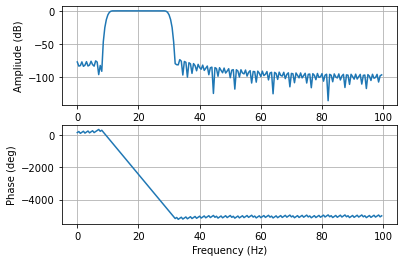

In [4]:
from blocksim.graphics import plotBode

fig = plt.figure()
axe_amp = fig.add_subplot(211)
axe_pha = fig.add_subplot(212, sharex=axe_amp)

plotBode(filt, axe_amp, axe_pha)

## Application of the filter
We construct s1 as a signal with f0 and 3*f0 frequencies

In [5]:
from blocksim.graphics import plotDSPLine
from blocksim.dsp.DSPSignal import DSPSignal

f0 = 20
ns = 200
t1 = np.arange(ns) / fs
x1 = exp(1j * 2 * pi * f0 * t1) + exp(1j * 2 * pi * 3 * f0 * t1)
s1 = DSPSignal(name="s1", samplingStart=0, samplingPeriod=1 / fs, y_serie=x1)

s2 is the expected signal at the output of the filter

In [6]:
x2 = exp(1j * 2 * pi * f0 * t1)
s2 = DSPSignal(name="s2", samplingStart=0, samplingPeriod=1 / fs, y_serie=x2)

## Simulation of the setup

In [7]:
from blocksim.Simulation import Simulation

sim = Simulation()

sim.addComputer(filt)
sim.addComputer(s1)
sim.connect("s1.setpoint", "filter.unfilt")

tps = s1.generateXSerie()
sim.simulate(tps, progress_bar=False)
log = sim.getLogger()
y = DSPSignal.fromLogger(name="filt", log=log, param="filter_filt_sample")

In [8]:
y = y.forceSamplingStart(-filt.getGroupDelay())

We plot s2 and y

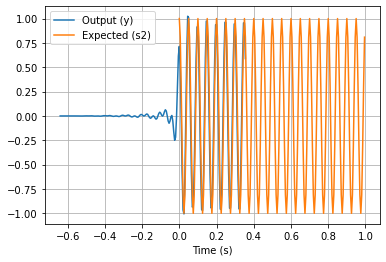

In [9]:
fig = plt.figure()
axe = fig.add_subplot(111)

_ = plotDSPLine(y, axe, label="Output (y)")
_ = plotDSPLine(s2, axe, label="Expected (s2)")
axe.legend()